In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = {
    'Name': ['Amit', 'Sagar', 'Puja'],
    'Math': [85, 90, 78],
    'Science': [92, 88, 80],
    'English': [75, 85, 82]
}

df = pd.DataFrame(data)
df['Total'] = df[['Math', 'Science', 'English']].sum(axis=1)

Q1: Normalize the Math scores using Min-Max scaling

In [4]:
scaler = MinMaxScaler()
df['Math_Normalized'] = scaler.fit_transform(df[['Math']])
df[['Name', 'Math_Normalized']]

,Name,Math_Normalized
0,Amit,0.583333
1,Sagar,1.000000
2,Puja,0.000000


Q2: Create a gender column and perform one-hot encoding

In [5]:
df['Gender'] = ['Male', 'Male', 'Female']

df_encoded = pd.get_dummies(df, columns=['Gender'])
df_encoded

,Name,Math,Science,English,Total,Math_Normalized,Gender_Female,Gender_Male
0,Amit,85,92,75,252,0.583333,False,True
1,Sagar,90,88,85,263,1.000000,False,True
2,Puja,78,80,82,240,0.000000,True,False


Q3: Group students by gender and calculate average marks

In [6]:
avg_marks = df.groupby('Gender')[['Math', 'Science', 'English']].mean()
avg_marks

,Math,Science,English
Gender,,,
Female,78.0,80.0,82.0
Male,87.5,90.0,80.0


Q4: Plot a pie chart of subject marks for Sagar

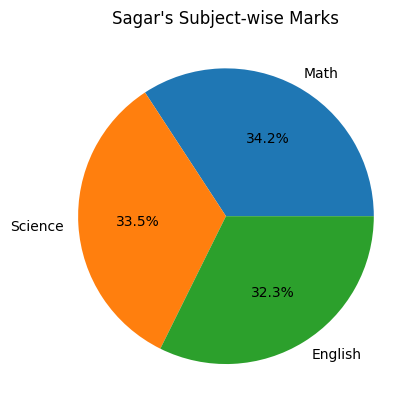

In [7]:
sagar_marks = df[df['Name'] == 'Sagar'][['Math', 'Science', 'English']].iloc[0]

plt.pie(sagar_marks.values, labels=sagar_marks.index, autopct='%1.1f%%')
plt.title("Sagar's Subject-wise Marks")
plt.show()

Q5: Add a Status column (Pass if Total ≥ 250, else Fail)

In [8]:
df['Status'] = np.where(df['Total'] >= 250, 'Pass', 'Fail')
df[['Name', 'Total', 'Status']]

,Name,Total,Status
0,Amit,252,Pass
1,Sagar,263,Pass
2,Puja,240,Fail


Q6: Count how many students passed

In [9]:
pass_count = (df['Status'] == 'Pass').sum()
print("Number of students passed:", pass_count)

Number of students passed: 2


Q7: Export the final DataFrame to a CSV file

In [10]:
df.to_csv('final_student_data.csv', index=False)

Q8: Plot a histogram of Math marks

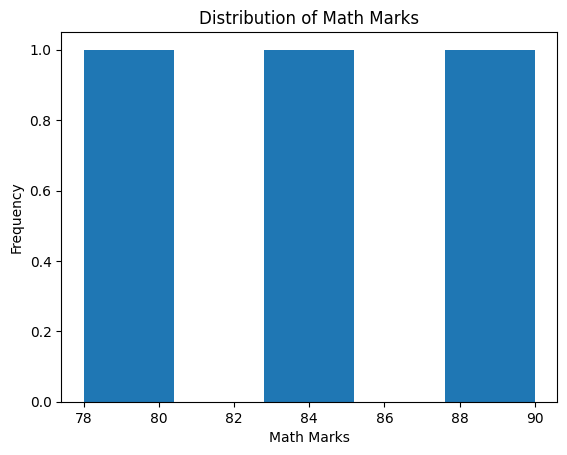

In [11]:
plt.hist(df['Math'], bins=5)
plt.xlabel('Math Marks')
plt.ylabel('Frequency')
plt.title('Distribution of Math Marks')
plt.show()

Q9: Rename Math column to Mathematics

In [12]:
df.rename(columns={'Math': 'Mathematics'}, inplace=True)
df.columns

Index(['Name', 'Mathematics', 'Science', 'English', 'Total', 'Math_Normalized',
       'Gender', 'Status'],
      dtype='object')

Q10: Plot a boxplot for English marks to check distribution and outliers

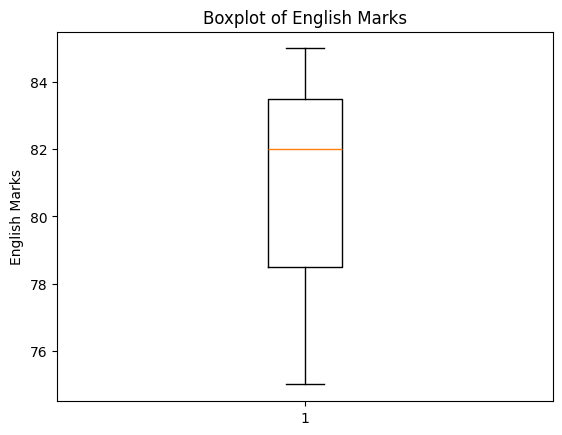

In [13]:
plt.boxplot(df['English'])
plt.ylabel('English Marks')
plt.title('Boxplot of English Marks')
plt.show()